In [1]:
import os
import torch
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cpu")

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from cv_utils import *

In [4]:
!pip install diffusers["torch"] transformers

   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/330.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/330.9 kB 72.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/330.9 kB 72.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/330.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float32).to(device)
pipeline.enable_model_cpu_offload()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

RuntimeError: Failed to import diffusers.pipelines.auto_pipeline because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.pag.pipeline_pag_hunyuandit because of the following error (look up to see its traceback):
PAGCFGIdentitySelfAttnProcessor2_0 requires PyTorch 2.0, to use it, please upgrade PyTorch to 2.0.

In [6]:
!pip uninstall torch -y
!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.0+cu118 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: torch 1.13.1
Uninstalling torch-1.13.1:
  Successfully uninstalled torch-1.13.1


You can safely remove it manually.


^C


In [7]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

NameError: name 'load_image' is not defined

In [ ]:
prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

In [ ]:
np.array(mask_image).shape

In [ ]:
plt.imshow(np.array(mask_image)[:, :, 2])

In [4]:
np.array(mask_image)[:, :, 0].sum(), np.array(mask_image)[:, :, 1].sum(), np.array(mask_image)[:, :, 2].sum()

(7094100, 7094100, 7094100)

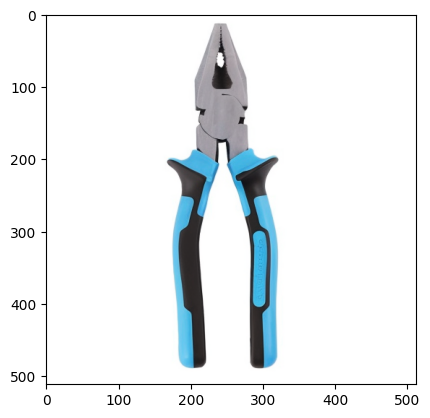

In [29]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image_i.png"
img = cv2.imread(image_path)
#img = invert_image(img)
plt.imshow(img)

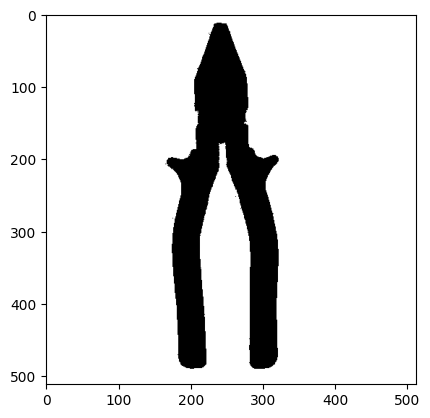

In [26]:
def create_object_mask(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the grayscale image to obtain a binary image
    ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask with the same dimensions as the input image
    mask = np.zeros_like(image)
    
    # Draw filled contours on the mask
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    
    # Invert the mask
    mask = cv2.bitwise_not(mask)
    
    return mask

mask = create_object_mask(img)
plt.imshow(mask)

In [31]:
pil_img = Image.fromarray(img)
pil_mask = Image.fromarray(mask)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [20:53<00:00, 12.53s/it]


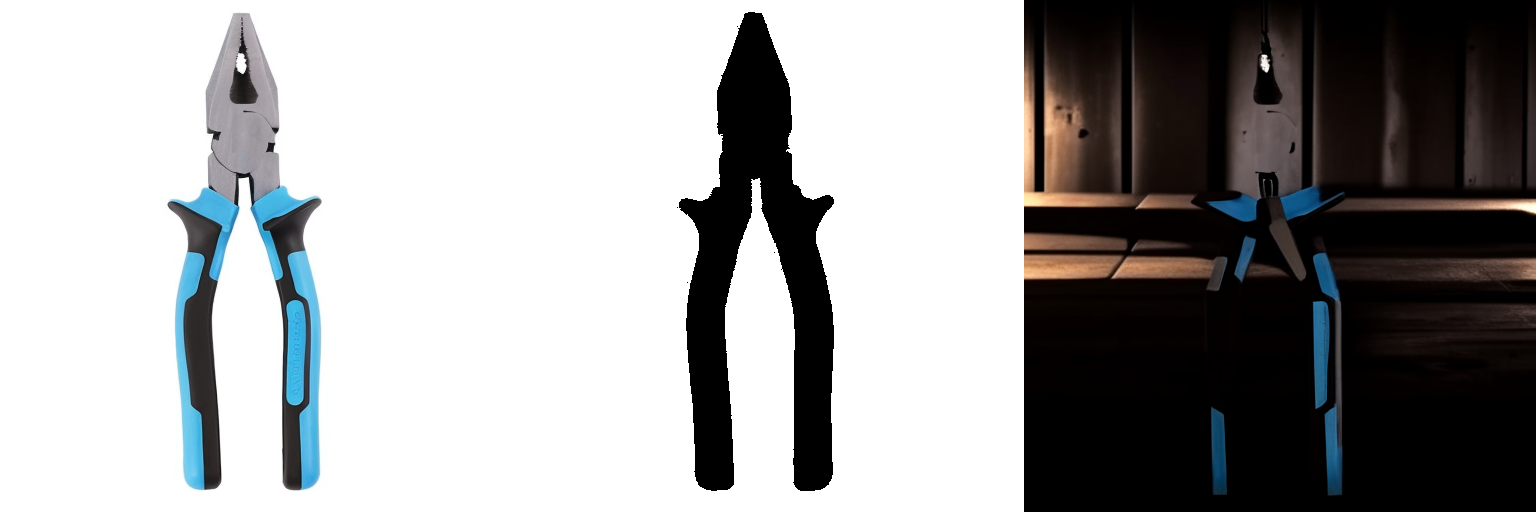

In [37]:
prompt = "Old Wooden surface in the background of plier having shadow, realistic, 4k"
negative_prompt = "bad anatomy, different color, Object is not clear incomplete dimensions, different shape, deformed, ugly, disfigured"
image = pipeline(prompt=prompt, negative_prompt=negative_prompt, image = pil_img, mask_image=pil_mask).images[0]
make_image_grid([pil_img, pil_mask, image], rows=1, cols=3)

In [38]:
cv2.imwrite("new_i.png", np.array(image))

True